# Data Preperation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

Extract data from csv file and display the shape and size. Shape of the data set should be (372037, 785).

In [2]:
data = pd.read_csv("./data/handwritten_data_785.csv", encoding = "utf8")
print(data.shape)

(372037, 785)


Have to shuffle data before doing anything.

In [3]:
data = data.values
np.random.shuffle(data)
print(data.shape)

(372037, 785)


In [4]:
X, y = data[:,1:], data[:,0]
print("X Shape:")
print(X.shape)
print("y Shape:")
print(y.shape)

X Shape:
(372037, 784)
y Shape:
(372037,)


Perform 80/20 Training/Test split.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

('X_train shape: ', (297629, 784))
('y_train shape: ', (297629,))
('X_test shape: ', (74408, 784))
('y_test shape: ', (74408,))


Experiment with different data pre-processing procedures, namely mean centering, and normalization of the data. Plot 4 images to get an idea of what the images might look like. First image is the original image, second image is the normalized image, third image is the mean centering image, and the last image is the image produced when combining mean centering, and normalization. 

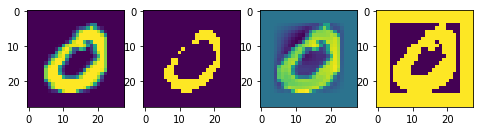

In [7]:
X_example = X_train[10]

fig= plt.figure(figsize=(8,8))
# Original image
X_example_orig_2d = X_example.reshape(28,28)
fig.add_subplot(1,4,1)
plt.imshow(X_example_orig_2d)

# Normalized Image
X_example_norm_2d = (X_example / 255).reshape(28,28)
fig.add_subplot(1,4,2)
plt.imshow(X_example_norm_2d)

# Mean Image
mean_image = np.mean(X_train, axis=0).astype(np.int64)
X_example_mean_2d = (X_example - mean_image).reshape(28,28)
fig.add_subplot(1,4,3)
plt.imshow(X_example_mean_2d)

# Combo Image
X_example_combo_2d = ((X_example - mean_image)/255).reshape(28,28)
fig.add_subplot(1,4,4)
plt.imshow(X_example_combo_2d)

plt.show()

After tinkering around with the data pre-processing, decided to go with the combination since it reduces the data adaquetly, while still maintaining the ability to identify the letter in the image. So now subtract the mean from every image, and divide the data by 255 to perform data preperation.

In [19]:
mean_image = np.mean(X_train, axis=0).astype(np.int64)
X_train = (X_train - mean_image)/255
X_test = (X_test - mean_image)/255

Display 16 different images from the training set to get an idea what our data set will look like.

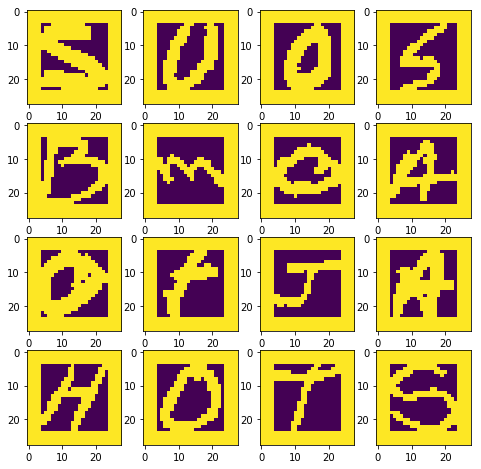

In [20]:
fig = plt.figure(figsize=(8,8))
columns = 4
rows = 4
for i in range(1, columns*rows + 1):
    img = np.random.randint(X_train.shape[0])
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[img].reshape(28,28))
plt.show()

Display all the values in the first training data set to see the type of data that is stored to represent each image. Matrix should be full of -1s, and 0s to represent the image now.

In [21]:
print(X_train[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  0  0  0 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0  0  0 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0  0  0
 -1  0  0  0 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0
  0  0  0 -1  0  0  0  0 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0 -1 -1  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0 -1
 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1 -1 -1 -1 -1 -1  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1 -1 -1 -1 -1 -1  0
  0  0  0  0

Make sure that there are only 26 different classifications in the output set. Examine the distribution of the labels by plotting the data. See which letters are the most common occurrences in the data set.

Class 14: 58154
Class 18: 48463
Class 20: 29117
Class 2: 23555
Class 19: 22668
Class 15: 19378
Class 13: 19093
Class 0: 14780
Class 12: 12454
Class 17: 11669
Class 11: 11641
Class 4: 11493
Class 24: 10909
Class 22: 10884
Class 3: 10599
Class 1: 8977
Class 9: 8615
Class 7: 7265
Class 23: 6298
Class 25: 6097
Class 16: 5890
Class 6: 5795
Class 10: 5621
Class 5: 1164
Class 8: 1118
Class 21: 340


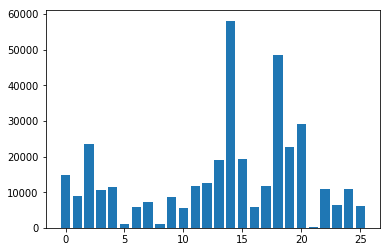

In [9]:
unique, counts = np.unique(y, return_counts=True)
label_dist = sorted(zip(unique, counts), key= lambda (k,v):(v,k), reverse=True)
for label,count in label_dist:
    print("Class {}: {}".format(label,count))
plt.bar(unique, counts)
plt.show()